#For Text Mining assignment
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
#https://www.amazon.in/Fire-Boltt-Stainless-Bluetooth-Monitoring-Assistant/product-reviews/B0CG1X67V1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [ ]:
!pip install selenium

In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [ ]:
watch_reviews=[]

#Extracting reviews from amazon for product Fire-Boltt watch

In [ ]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Fire-Boltt-Stainless-Bluetooth-Monitoring-Assistant/product-reviews/B0CG1X67V1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    watch_reviews = watch_reviews+op

In [ ]:
watch_reviews

["\nThe Fire-Boltt Talk 2 Bluetooth Calling Smartwatch offers a range of features but falls short in some areas. While it boasts dual buttons for ease of use and hands-free voice assistance, it doesn't fully deliver on its promise. The Bluetooth calling is a useful addition, but the in-built mic and speaker could be better in terms of sound quality.The 120 sports modes are a plus, providing versatility for fitness enthusiasts. However, the watch's user interface can be a bit confusing, making it challenging to navigate through the options effectively. The IP68 rating for water resistance is appreciated, ensuring it can handle daily activities.In conclusion, the Fire-Boltt Talk 2 Smartwatch has potential but needs refinements, especially in the call quality and user interface departments. It's a decent choice for those seeking a budget-friendly smartwatch with some useful features, but there are better options available in the market.\n",
 "\nProduct Review: Fire Bolt Talk ProRating: ★★

In [ ]:
reviews = ' '.join(watch_reviews)

#Data Cleaning

In [ ]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower()
reviews = re.sub("[0-9" "]+"," ",reviews).lower()
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#tokenize

In [ ]:
reviews_token = word_tokenize(reviews)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

In [ ]:
reviews_without_sw

['fire',
 'boltt',
 'talk',
 'bluetooth',
 'calling',
 'smartwatch',
 'offers',
 'range',
 'features',
 'falls',
 'short',
 'areas',
 'boasts',
 'dual',
 'buttons',
 'ease',
 'hands',
 'free',
 'voice',
 'assistance',
 'fully',
 'deliver',
 'promise',
 'bluetooth',
 'calling',
 'addition',
 'built',
 'mic',
 'speaker',
 'terms',
 'sound',
 'quality',
 'sports',
 'modes',
 'providing',
 'versatility',
 'fitness',
 'enthusiasts',
 'watch',
 'user',
 'interface',
 'bit',
 'confusing',
 'making',
 'challenging',
 'navigate',
 'options',
 'effectively',
 'ip',
 'rating',
 'water',
 'resistance',
 'appreciated',
 'ensuring',
 'handle',
 'daily',
 'activities',
 'conclusion',
 'fire',
 'boltt',
 'talk',
 'smartwatch',
 'potential',
 'refinements',
 'especially',
 'call',
 'quality',
 'user',
 'interface',
 'departments',
 'decent',
 'choice',
 'seeking',
 'budget',
 'friendly',
 'smartwatch',
 'features',
 'options',
 'available',
 'market',
 'product',
 'review',
 'fire',
 'bolt',
 'talk',
 

In [ ]:
reviews=' '.join(reviews_without_sw)
reviews

'fire boltt talk bluetooth calling smartwatch offers range features falls short areas boasts dual buttons ease hands free voice assistance fully deliver promise bluetooth calling addition built mic speaker terms sound quality sports modes providing versatility fitness enthusiasts watch user interface bit confusing making challenging navigate options effectively ip rating water resistance appreciated ensuring handle daily activities conclusion fire boltt talk smartwatch potential refinements especially call quality user interface departments decent choice seeking budget friendly smartwatch features options available market product review fire bolt talk prorating recently opportunity test fire bolt talk pro wireless earphone model promises high quality sound seamless connectivity review based experience product design build quality fire bolt talk pro features sleek compact design earphones glossy black finish giving stylish build quality impressive sturdy construction feels durable withs

#Word cloud

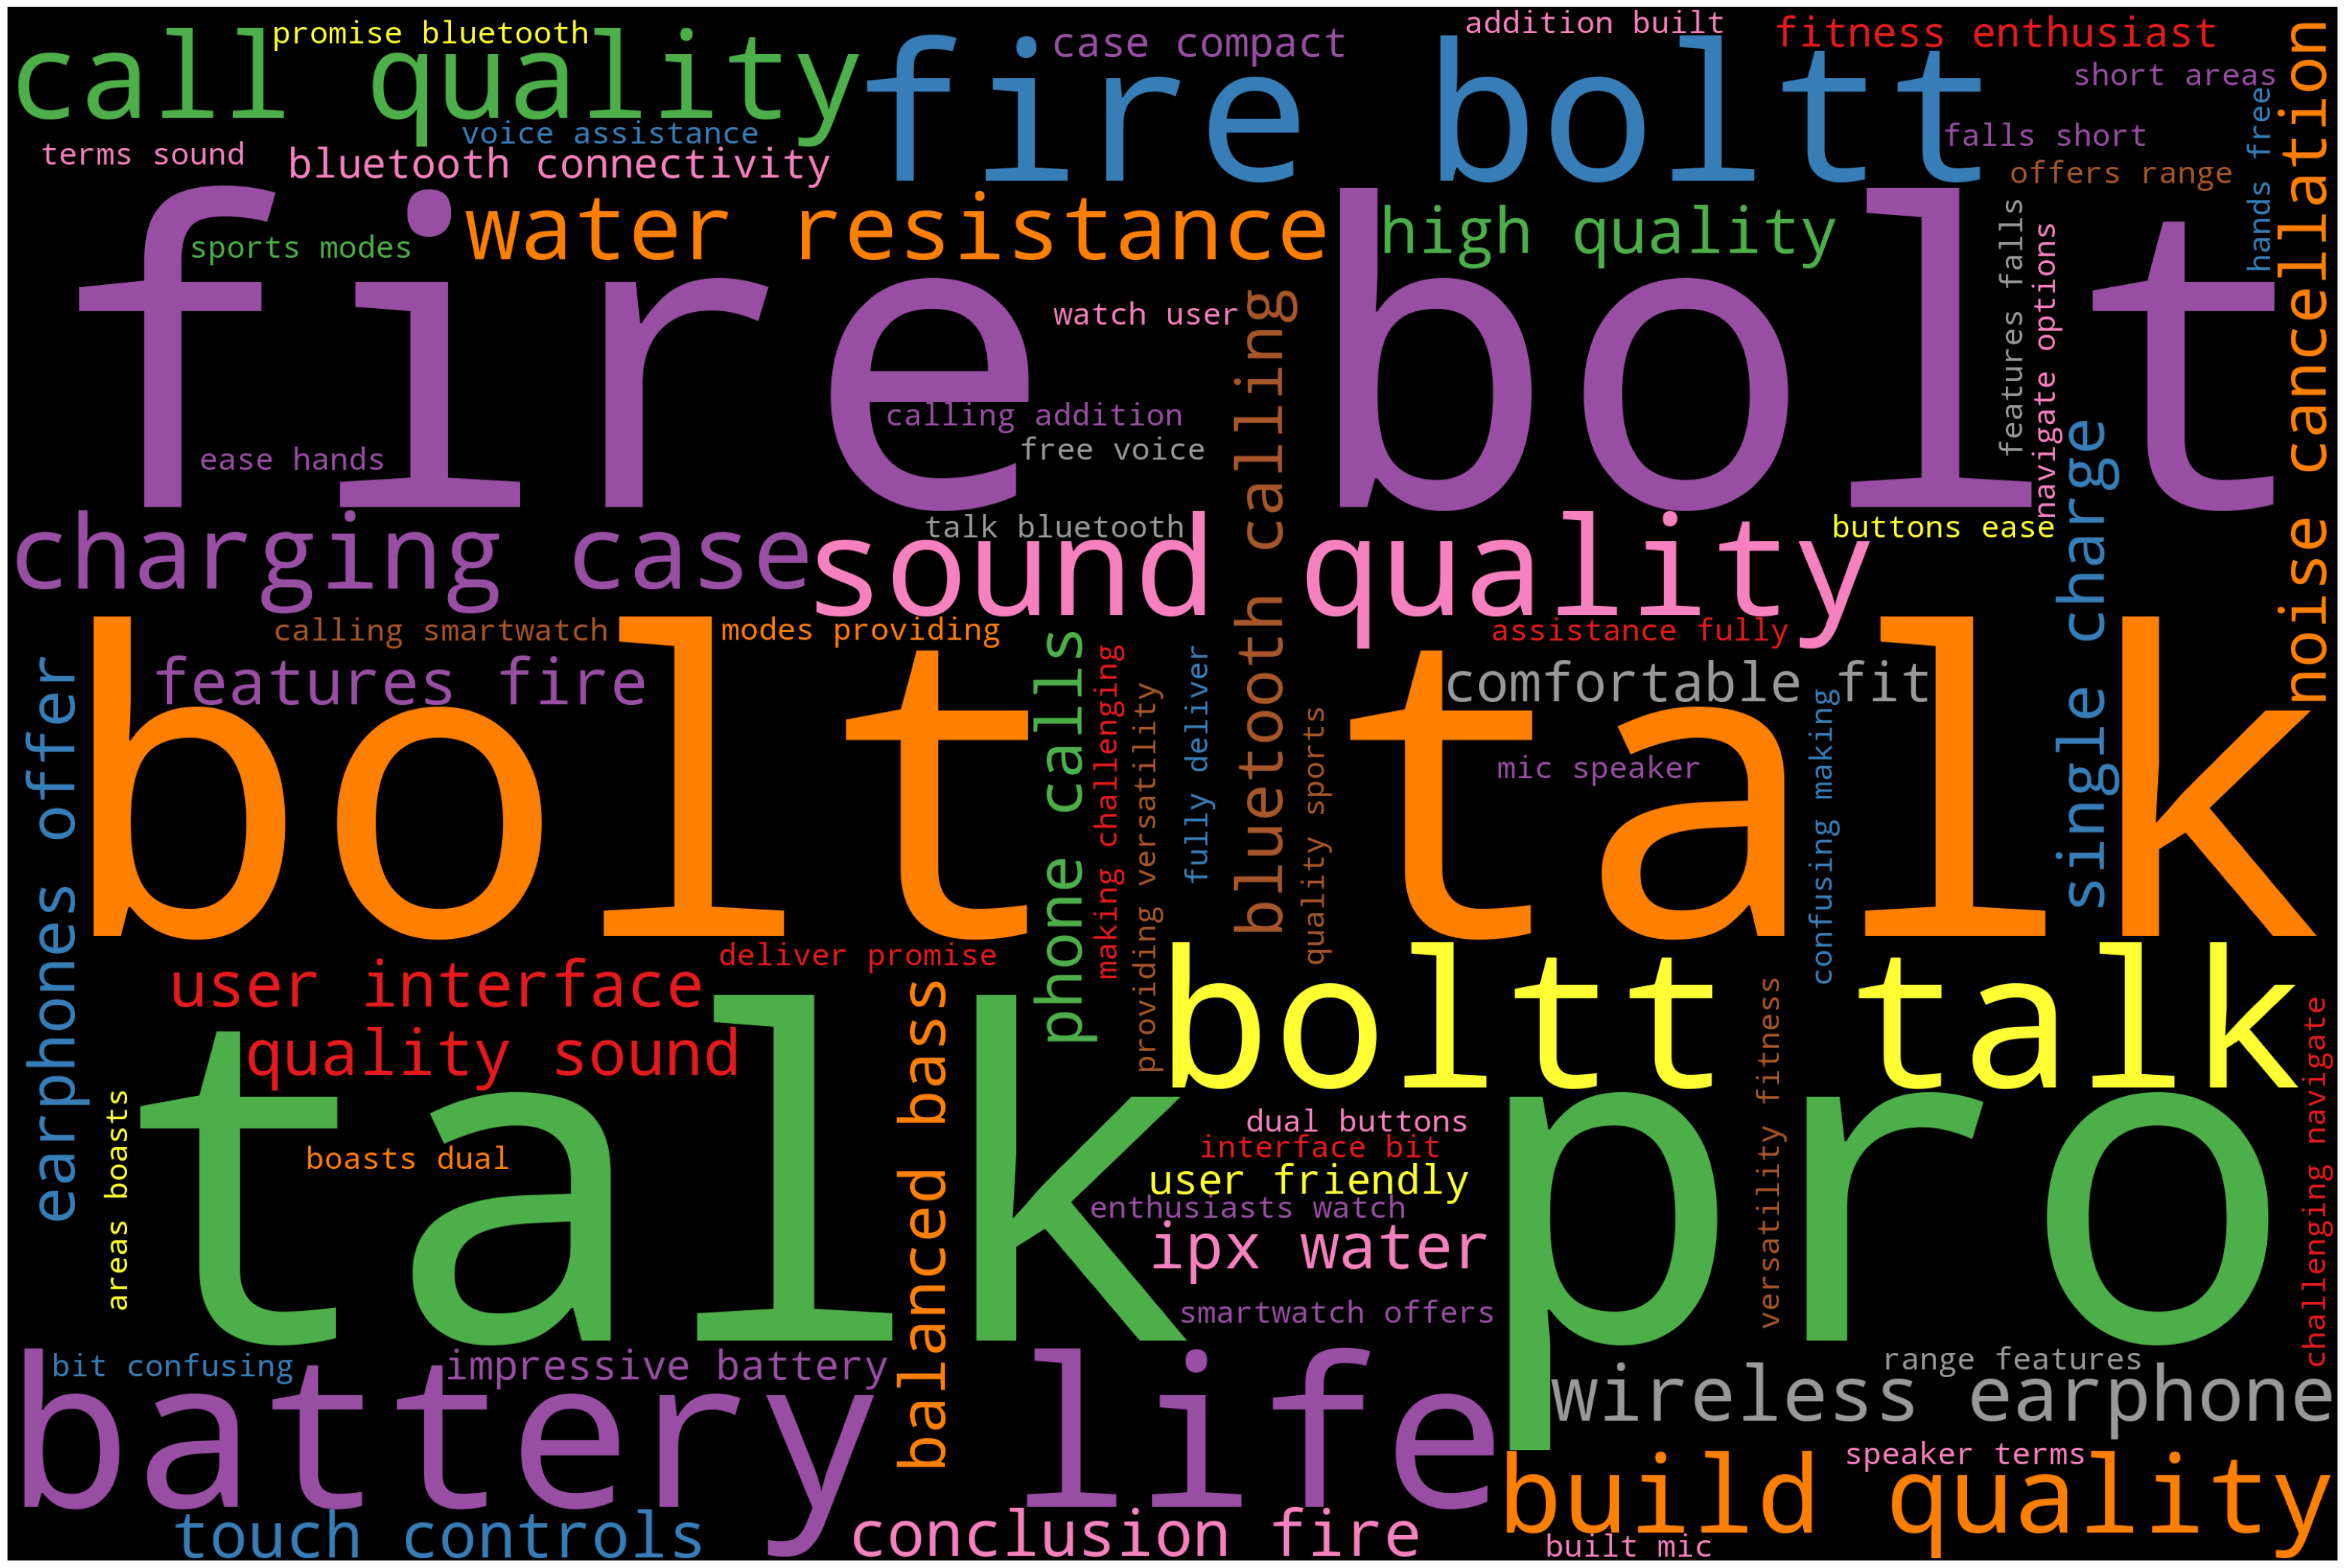

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

#Emotion Mining


In [ ]:
with open("/content/negative-words (1).txt","r",encoding='latin-1') as f:
    negative=f.read().split("\n")

In [ ]:
negative = negative[35:]

In [ ]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

#Word Cloud for negative word

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

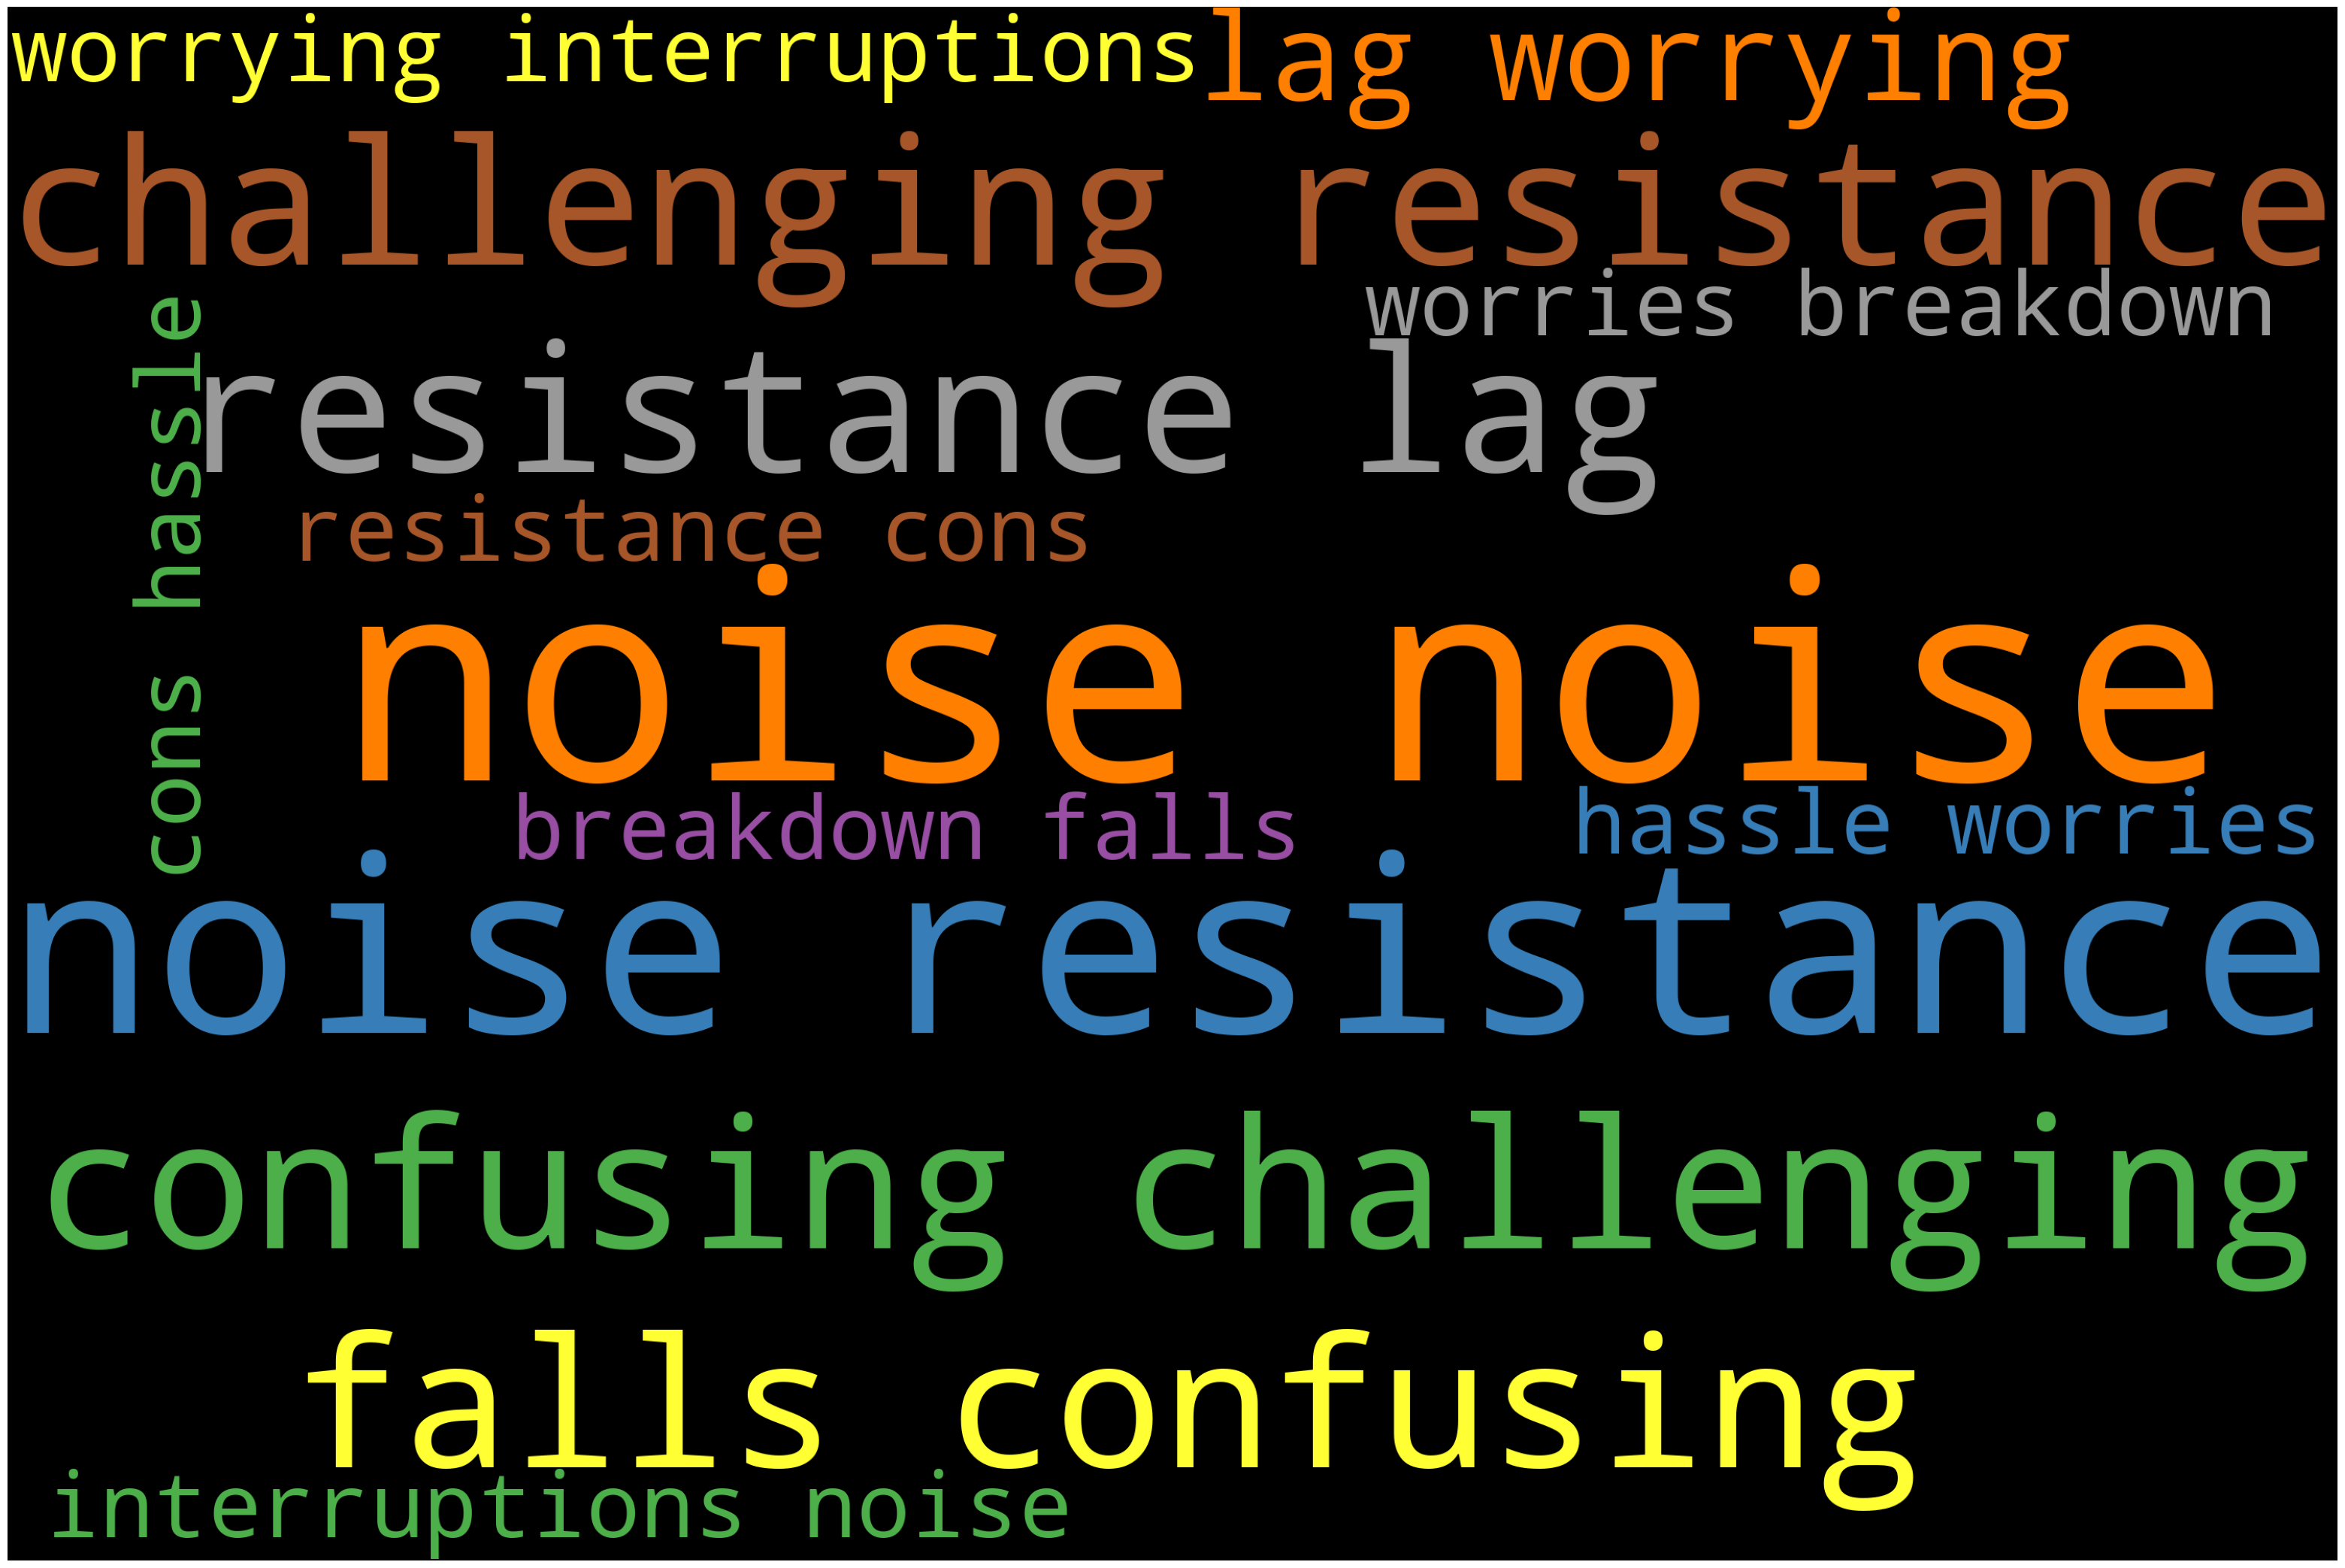

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [ ]:
with open("/content/positive-words (1).txt","r") as f:
    positive=f.read().split("\n")

In [ ]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [ ]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

#Word Cloud for positive word

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

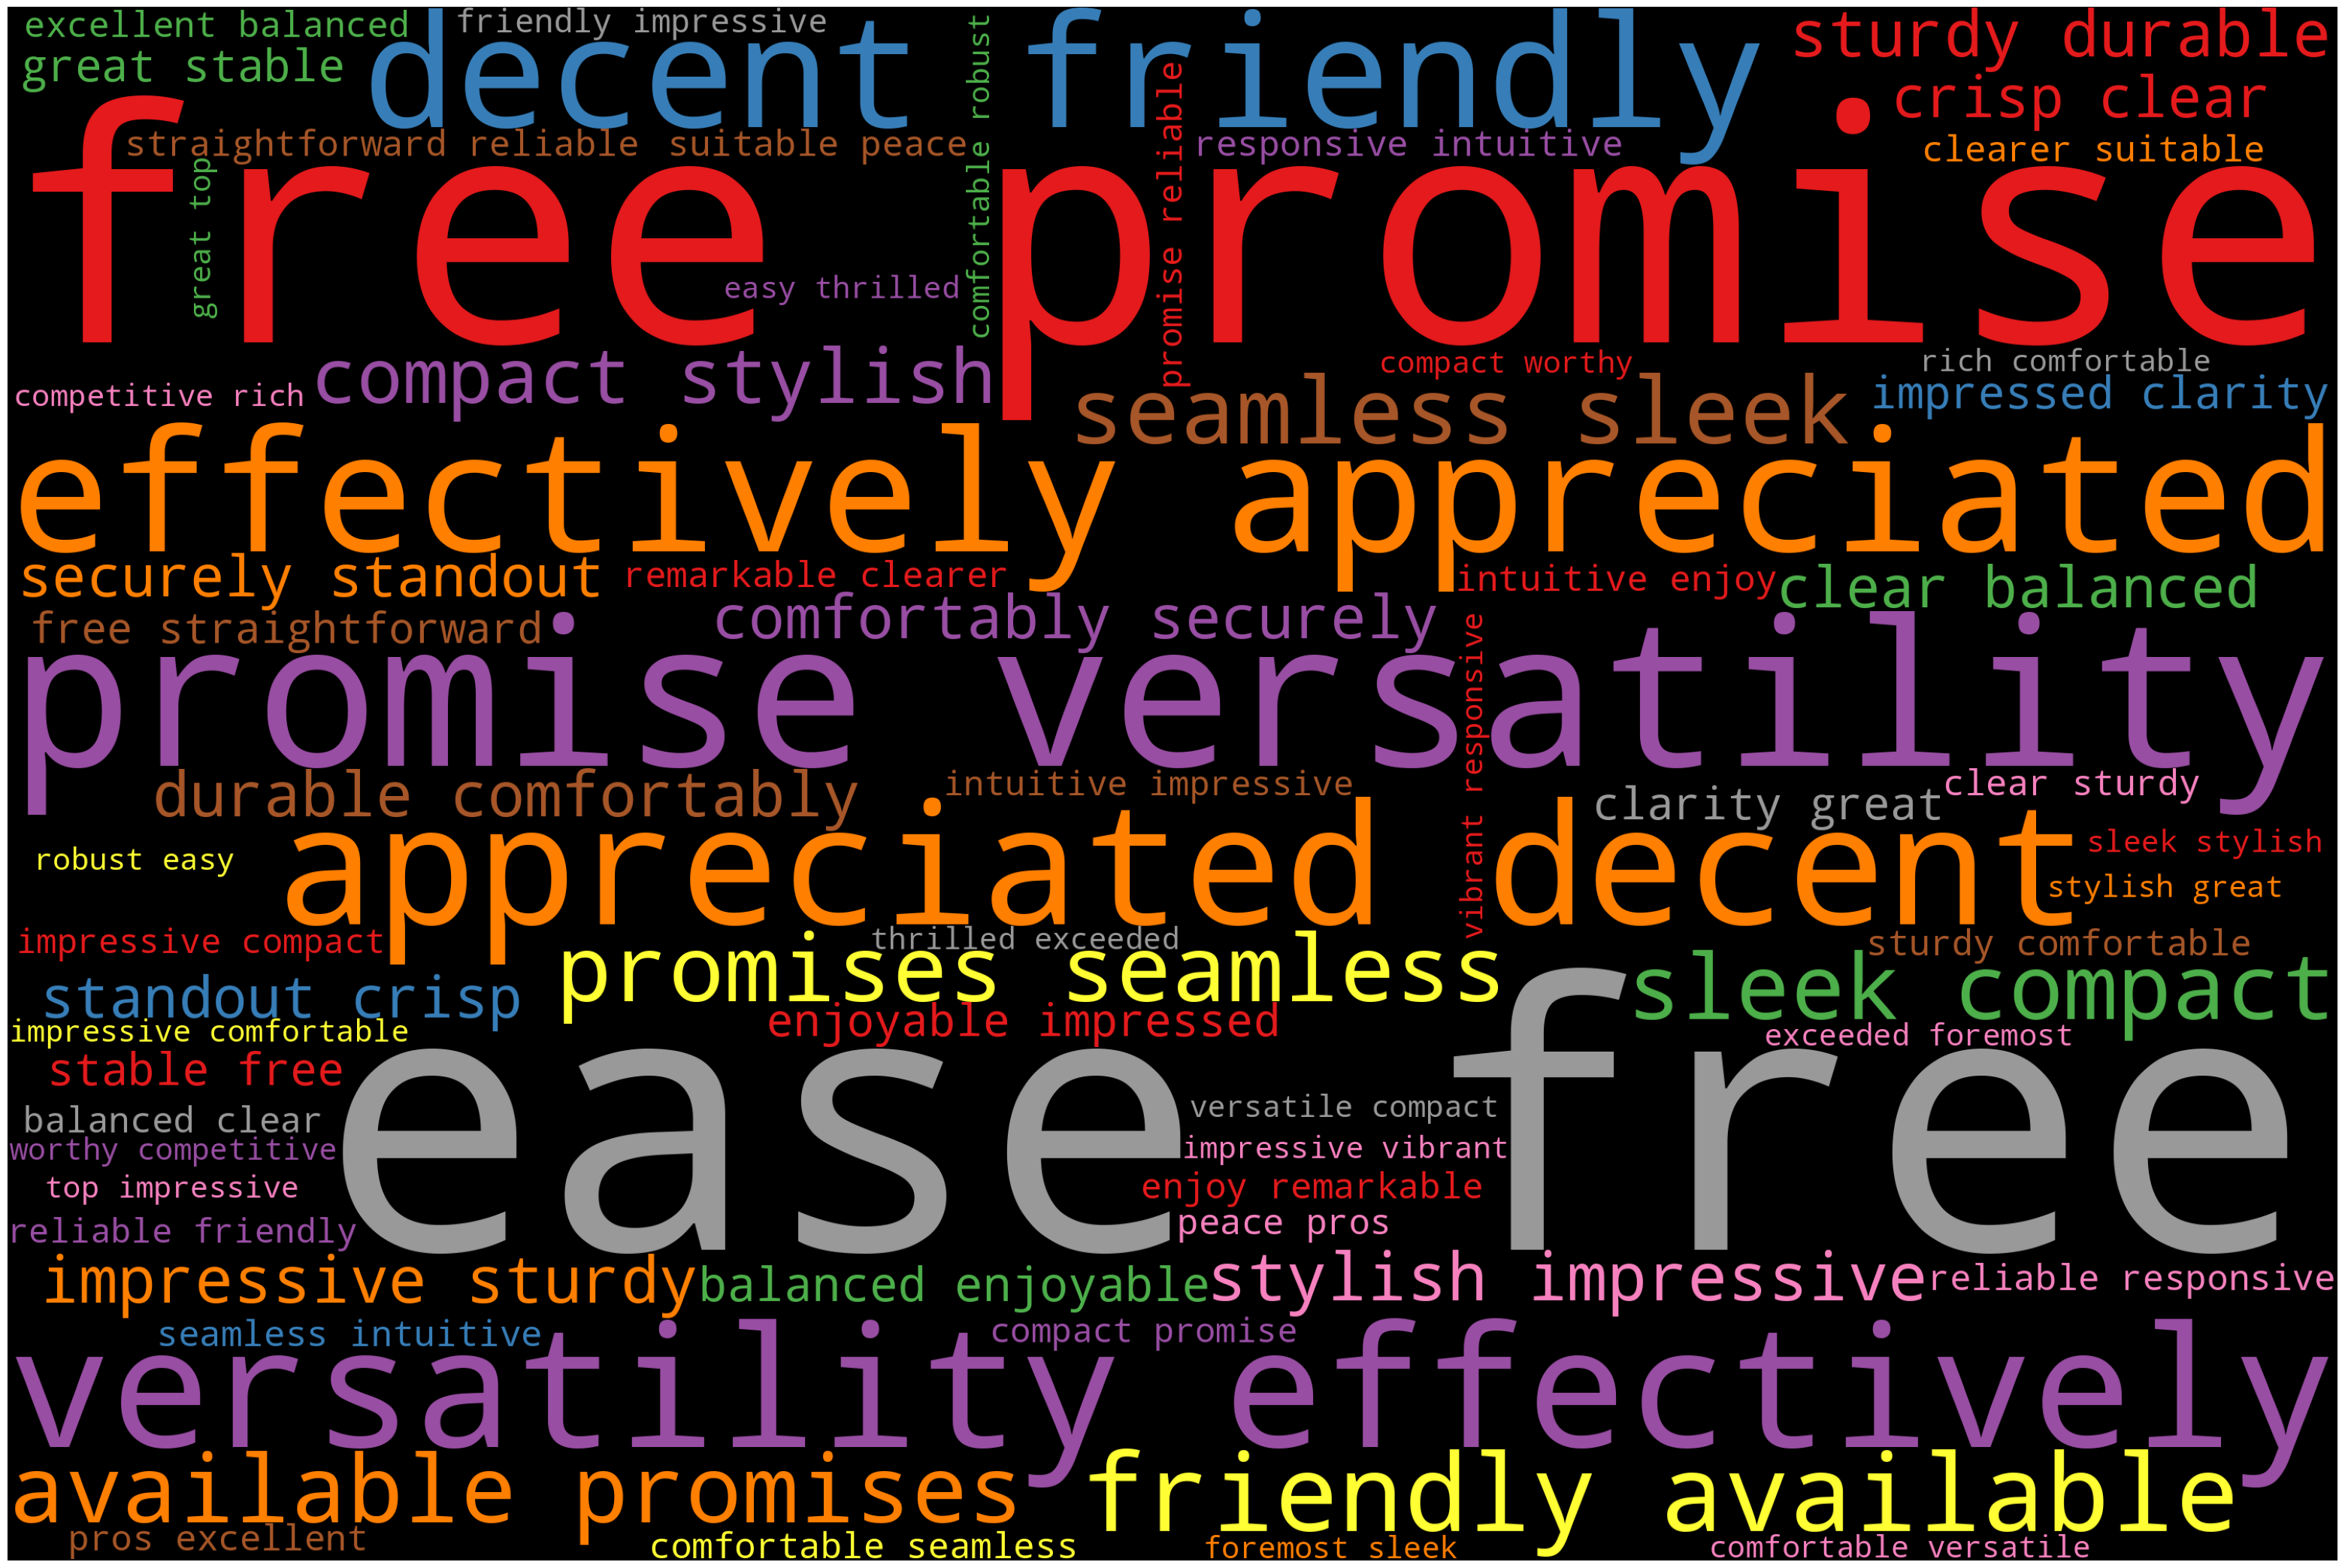

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)

In [ ]:
len(reviews_neg)

4259

In [ ]:
len(reviews_pos)

24359

In [ ]:
len(reviews)

149039

#Vader Lexicon

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(reviews)

{'neg': 0.061, 'neu': 0.647, 'pos': 0.293, 'compound': 1.0}

In [ ]:
def get_vader_sentiment(review):
    '''
    Utility function to classify sentiment of passed tweet
    using textblob's sentiment method
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text
    analysis = sia.polarity_scores(review)
    # set sentiment
    if analysis["compound"] > 0:
        return 'positive sentiment'
    elif analysis["compound"] < 0:
        return 'negative sentiment'
    else:
        return 'neutral'

In [ ]:
get_vader_sentiment(reviews)

'positive sentiment'